<a href="https://colab.research.google.com/github/Angela-Park-JE/TIL_in_NanoDegree/blob/main/ND-python-1-basics-assignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import pandas as pd
import seaborn as sns
%matplotlib inline
df = sns.load_dataset("tips")
df.shape

(244, 7)

In [ ]:
df.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


In [ ]:
df.sample(5)

,total_bill,tip,sex,smoker,day,time,size
175,32.90,3.11,Male,Yes,Sun,Dinner,2
138,16.00,2.00,Male,Yes,Thur,Lunch,2
37,16.93,3.07,Female,No,Sat,Dinner,3
238,35.83,4.67,Female,No,Sat,Dinner,3
202,13.00,2.00,Female,Yes,Thur,Lunch,2


## 1. total_bill 을 size 로 나눠서 1인당 가격을 구한결과를 "per_bill"이라는 컬럼에 담아주세요. 그리고 per_bill 컬럼에 담긴 값을 describe() 합니다.
```
count    244.00000
mean       7.88823
std        2.91435
min        2.87500
25%        5.80250
50%        7.25500
75%        9.39000
max       20.27500
Name: per_bill, dtype: float64
```

In [ ]:
df["total_bill"]/df["size"]

0       8.495000
1       3.446667
2       7.003333
3      11.840000
4       6.147500
         ...    
239     9.676667
240    13.590000
241    11.335000
242     8.910000
243     9.390000
Length: 244, dtype: float64

In [ ]:
df["per_bill"] = df["total_bill"]/df["size"]
per_bill.describe()

# 컬럼 만들어서 담는법을 까먹다니...

count    244.00000
mean       7.88823
std        2.91435
min        2.87500
25%        5.80250
50%        7.25500
75%        9.39000
max       20.27500
dtype: float64

## 2. groupby 를 사용해서 "time", "smoker" 를 그룹화 하고 "per_bill" 의 요약값을 구합니다. 
* 다음의 결과가 출력되도록 합니다.
<table border="1" class="dataframe">
  <thead>
    <tr style="text-align: right;">
      <th></th>
      <th></th>
      <th>count</th>
      <th>mean</th>
      <th>std</th>
      <th>min</th>
      <th>25%</th>
      <th>50%</th>
      <th>75%</th>
      <th>max</th>
    </tr>
    <tr>
      <th>time</th>
      <th>smoker</th>
      <th></th>
      <th></th>
      <th></th>
      <th></th>
      <th></th>
      <th></th>
      <th></th>
      <th></th>
    </tr>
  </thead>
  <tbody>
    <tr>
      <th rowspan="2" valign="top">Lunch</th>
      <th>Yes</th>
      <td>23.0</td>
      <td>7.939420</td>
      <td>2.805047</td>
      <td>5.045000</td>
      <td>6.303333</td>
      <td>6.755000</td>
      <td>8.4350</td>
      <td>16.340</td>
    </tr>
    <tr>
      <th>No</th>
      <td>45.0</td>
      <td>6.996419</td>
      <td>2.082856</td>
      <td>3.755000</td>
      <td>5.585000</td>
      <td>6.580000</td>
      <td>8.3300</td>
      <td>12.355</td>
    </tr>
    <tr>
      <th rowspan="2" valign="top">Dinner</th>
      <th>Yes</th>
      <td>70.0</td>
      <td>9.003529</td>
      <td>3.839788</td>
      <td>2.875000</td>
      <td>6.060500</td>
      <td>7.875000</td>
      <td>11.1725</td>
      <td>20.275</td>
    </tr>
    <tr>
      <th>No</th>
      <td>106.0</td>
      <td>7.519203</td>
      <td>2.278733</td>
      <td>3.443333</td>
      <td>5.705833</td>
      <td>7.019167</td>
      <td>9.0050</td>
      <td>13.205</td>
    </tr>
  </tbody>
</table>

In [ ]:
# 결과를 group_per 변수에 담고 group_per 변수를 출력해 주세요.

group_per = pd.DataFrame()
group_per = df.groupby(["time","smoker"])["per_bill"].describe(include="all")
group_per

count      mean       std  ...       50%      75%     max
time   smoker                             ...                           
Lunch  Yes      23.0  7.939420  2.805047  ...  6.755000   8.4350  16.340
       No       45.0  6.996419  2.082856  ...  6.580000   8.3300  12.355
Dinner Yes      70.0  9.003529  3.839788  ...  7.875000  11.1725  20.275
       No      106.0  7.519203  2.278733  ...  7.019167   9.0050  13.205

[4 rows x 8 columns]

## 3. 위 문제의 결과로 group_per 라고 저장된 데이터 프레임에서  Lunch 데이터만 가져옵니다.
* 아래의 결과가 출력되도록 합니다.
<table border="1" class="dataframe">
  <thead>
    <tr style="text-align: right;">
      <th></th>
      <th>count</th>
      <th>mean</th>
      <th>std</th>
      <th>min</th>
      <th>25%</th>
      <th>50%</th>
      <th>75%</th>
      <th>max</th>
    </tr>
    <tr>
      <th>smoker</th>
      <th></th>
      <th></th>
      <th></th>
      <th></th>
      <th></th>
      <th></th>
      <th></th>
      <th></th>
    </tr>
  </thead>
  <tbody>
    <tr>
      <th>Yes</th>
      <td>23.0</td>
      <td>7.939420</td>
      <td>2.805047</td>
      <td>5.045</td>
      <td>6.303333</td>
      <td>6.755</td>
      <td>8.435</td>
      <td>16.340</td>
    </tr>
    <tr>
      <th>No</th>
      <td>45.0</td>
      <td>6.996419</td>
      <td>2.082856</td>
      <td>3.755</td>
      <td>5.585000</td>
      <td>6.580</td>
      <td>8.330</td>
      <td>12.355</td>
    </tr>
  </tbody>
</table>

In [ ]:
group_per.loc["Lunch"]

,count,mean,std,min,25%,50%,75%,max
smoker,,,,,,,,
Yes,23.0,7.939420,2.805047,5.045,6.303333,6.755,8.435,16.340
No,45.0,6.996419,2.082856,3.755,5.585000,6.580,8.330,12.355


## 4. "day", "smoker" 로 그룹화 하고 "size" 의 "count", "mean" 값을 구해주세요. 
* 다음의 결과가 출력되도록 합니다.
<table border="1" class="dataframe">
  <thead>
    <tr style="text-align: right;">
      <th></th>
      <th></th>
      <th>count</th>
      <th>mean</th>
    </tr>
    <tr>
      <th>day</th>
      <th>smoker</th>
      <th></th>
      <th></th>
    </tr>
  </thead>
  <tbody>
    <tr>
      <th rowspan="2" valign="top">Thur</th>
      <th>Yes</th>
      <td>17</td>
      <td>2.352941</td>
    </tr>
    <tr>
      <th>No</th>
      <td>45</td>
      <td>2.488889</td>
    </tr>
    <tr>
      <th rowspan="2" valign="top">Fri</th>
      <th>Yes</th>
      <td>15</td>
      <td>2.066667</td>
    </tr>
    <tr>
      <th>No</th>
      <td>4</td>
      <td>2.250000</td>
    </tr>
    <tr>
      <th rowspan="2" valign="top">Sat</th>
      <th>Yes</th>
      <td>42</td>
      <td>2.476190</td>
    </tr>
    <tr>
      <th>No</th>
      <td>45</td>
      <td>2.555556</td>
    </tr>
    <tr>
      <th rowspan="2" valign="top">Sun</th>
      <th>Yes</th>
      <td>19</td>
      <td>2.578947</td>
    </tr>
    <tr>
      <th>No</th>
      <td>57</td>
      <td>2.929825</td>
    </tr>
  </tbody>
</table>

In [ ]:
df.groupby(["day","smoker"])["size"].agg(['count','mean'])

count      mean
day  smoker                 
Thur Yes        17  2.352941
     No         45  2.488889
Fri  Yes        15  2.066667
     No          4  2.250000
Sat  Yes        42  2.476190
     No         45  2.555556
Sun  Yes        19  2.578947
     No         57  2.929825

In [ ]:
# pd.pivot_table(data=df, index =["day", "smoker"], values = "size").agg(['count','mean'])
# 모야아아아아ㅏㅏ count는 smoker로 나뉜것만 나왔당모야앙

,size
count,8.000000
mean,2.462377




---



In [3]:
# 데이터를 로드해 주세요.
mpg = sns.load_dataset("mpg")
print(mpg.shape)
mpg.head()

(398, 9)


,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,name
0,18.0,8,307.0,130.0,3504,12.0,70,usa,chevrolet chevelle malibu
1,15.0,8,350.0,165.0,3693,11.5,70,usa,buick skylark 320
2,18.0,8,318.0,150.0,3436,11.0,70,usa,plymouth satellite
3,16.0,8,304.0,150.0,3433,12.0,70,usa,amc rebel sst
4,17.0,8,302.0,140.0,3449,10.5,70,usa,ford torino


## 5. horsepower 가 결측치가 아닌 것만 가져와서 origin 으로 그룹화 하고 weight 의 평균값을 구합니다.
* 다음의 결과가 출력되도록 합니다.
```
origin
europe    2433.470588
japan     2221.227848
usa       3372.489796
Name: weight, dtype: float64
```

In [4]:
#1. horsepower가 결측치가 아닌것 구하기
# 결측치 행 제거
# df.dropna(subset=["컬럼"],inplace=True)

mpg.dropna(subset=["horsepower"], inplace =True)

In [5]:
#2. origin으로 그룹화하기
mpg.groupby(["origin"])["weight"].mean()

origin
europe    2433.470588
japan     2221.227848
usa       3372.489796
Name: weight, dtype: float64

## 6. name 에 audi 가 들어가는 데이터의 horsepower 컬럼의 요약값을 구합니다.
* 다음의 결과가 출력되도록 합니다.
```
count      7.000000
mean      86.714286
std       11.842217
min       67.000000
25%       80.500000
50%       90.000000
75%       93.000000
max      103.000000
Name: horsepower, dtype: float64
```

In [13]:
# name에 audi가 들어가는 데이터
# https://yganalyst.github.io/data_handling/memo_9/#5-%ED%8F%AC%ED%95%A8%EA%B8%80%EC%9E%90-%EC%9D%B8%EC%8B%9D-strcontains
# df[df['법정동명'].str.contains("강서구")].head()

mpg[mpg['name'].str.contains("audi")]["horsepower"].describe()

count      7.000000
mean      86.714286
std       11.842217
min       67.000000
25%       80.500000
50%       90.000000
75%       93.000000
max      103.000000
Name: horsepower, dtype: float64

## 7. name 에 diesel 이 들어가는 데이터에서 "origin", "model_year" 로 그룹화 하고 "horsepower" 의 평균을 구합니다.
* 다음의 결과가 출력되도록 합니다.

```
origin  model_year
europe  78            48.000000
        80            54.333333
        81            78.000000
usa     82            85.000000
Name: horsepower, dtype: float64
```

In [14]:
mpg[mpg["name"].str.contains("diesel")].groupby(["origin", "model_year"])["horsepower"].mean()

origin  model_year
europe  78            48.000000
        80            54.333333
        81            78.000000
usa     82            85.000000
Name: horsepower, dtype: float64

## 8. "model_year"가 75보다 작은 값을 가지는 데이터프레임에서 pivot_table 을 사용해서 "model_year", "origin" 별  "weight"의 평균을 구해 다음과 같이 출력되도록 합니다.
<table border="1" class="dataframe">
  <thead>
    <tr style="text-align: right;">
      <th>origin</th>
      <th>europe</th>
      <th>japan</th>
      <th>usa</th>
    </tr>
    <tr>
      <th>model_year</th>
      <th></th>
      <th></th>
      <th></th>
    </tr>
  </thead>
  <tbody>
    <tr>
      <th>70</th>
      <td>2309.200000</td>
      <td>2251.00</td>
      <td>3716.500000</td>
    </tr>
    <tr>
      <th>71</th>
      <td>2024.000000</td>
      <td>1936.00</td>
      <td>3401.600000</td>
    </tr>
    <tr>
      <th>72</th>
      <td>2573.200000</td>
      <td>2300.40</td>
      <td>3682.666667</td>
    </tr>
    <tr>
      <th>73</th>
      <td>2335.714286</td>
      <td>2397.25</td>
      <td>3821.448276</td>
    </tr>
    <tr>
      <th>74</th>
      <td>2139.333333</td>
      <td>2053.00</td>
      <td>3503.333333</td>
    </tr>
  </tbody>
</table>

In [17]:
# pd.pivot_table(data=df, index ="alive", values = "age") 

pd.pivot_table(data=mpg[mpg["model_year"] < 75], index = ["model_year", "origin"], values = "weight")
# 웅?

weight
model_year origin             
70         europe  2309.200000
           japan   2251.000000
           usa     3716.500000
71         europe  2024.000000
           japan   1936.000000
           usa     3472.947368
72         europe  2573.200000
           japan   2300.400000
           usa     3682.666667
73         europe  2335.714286
           japan   2397.250000
           usa     3821.448276
74         europe  2139.333333
           japan   2053.000000
           usa     3548.214286

In [18]:
pd.pivot_table(data=mpg[mpg["model_year"] < 75], index = ["model_year"], columns = ["origin"], values = "weight")

origin,europe,japan,usa
model_year,,,
70,2309.200000,2251.00,3716.500000
71,2024.000000,1936.00,3472.947368
72,2573.200000,2300.40,3682.666667
73,2335.714286,2397.25,3821.448276
74,2139.333333,2053.00,3548.214286


## 9. x축에 horsepower 를 y축에 weight 를 지정하고 cylinders 에 따라 색상이 다르게 표현되도록 그래프를 그려주세요.
<img src="https://i.imgur.com/bMmZ2oi.png" width="400">

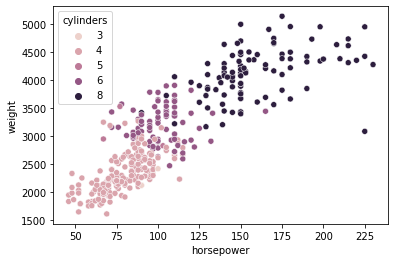

In [19]:
sns.scatterplot(data=mpg, x = "horsepower", y = "weight", hue = "cylinders")

## 10. 위에서 불러온 mpg 데이터를 csv 파일로 저장합니다. (제출 시 저장한 csv 파일은 제출하지 않아도 됩니다.)
또, 인덱스 컬럼은 저장되지 않도록 합니다.

In [26]:
# df.to_csv("pandas_df_20211121.csv", index=False)

# import pandas as pd
# data = pd.read_csv(r"Data_example.csv")
# selectdata = pd.DataFrame(data, columns=['Signal Name', 'Signal Value', "Target"])
# selectdata.to_csv(r"C:\Users\Bens\Desktop\V1\Modified_data.csv")
# https://appia.tistory.com/219

mpg.to_csv("mpg.csv", index=False)

In [28]:
# 제대로 저장이 되었다면 다음 형태로 파일이 불러와 집니다.

data = pd.read_csv("mpg.csv")
data.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,name
0,18.0,8,307.0,130.0,3504,12.0,70,usa,chevrolet chevelle malibu
1,15.0,8,350.0,165.0,3693,11.5,70,usa,buick skylark 320
2,18.0,8,318.0,150.0,3436,11.0,70,usa,plymouth satellite
3,16.0,8,304.0,150.0,3433,12.0,70,usa,amc rebel sst
4,17.0,8,302.0,140.0,3449,10.5,70,usa,ford torino
